# Esame Laboratorio di Programmazione II - 22/07/2025


Scrivete chiaramente sul notebook il vostro nome e matricola e rinominate il file che consegnate come `matricola.ipynb` (la matricola è SMnumeri o ECnumeri).

Per ogni funzione e metodo che richiede un campionamento rispetto ad una distribuzione settate il seed a 0: ``np.random.seed(0)``.

Stampate il risultato delle domande e consegnate il compito eseguito, quindi per cui ogni cella ha il corrispondente output.
Quindi ad esempio

e.g., 
NON scrivete: 
```python 
    lista=np.array([1,2,3])
```
ma 
```python
    lista=np.array([1,2,3]) 
    print('lista =', lista)   
```
Attenzione!Se scrivete:
```python
    lista=np.array([1,2,3])
    lista
```
``lista`` sarà l'unico ouput che si vede di quella cella

NB: Potete usare anche più di una cella python per domanda e se l'output è una matrice molto grande non dovete stamparla.

Sarà valutata anche la presentazione, ad esempio un plot senza etichette sugli assi o illeggibili sarà valutato meno bene di uno con etichette chiare.

Cercate di commmentare il compito di modo che si capisca cosa avete fatto.

Controllate attentamente di avere consegnato il file giusto.

## Esercizio 1

Crea un vettore NumPy con le seguenti spese annuali per l’auto (in euro) sostenute da 7 persone:
3200, 2750, 4100, 3600, 2950, 5100, 4400

1. Calcola la spesa totale complessiva sostenuta dal gruppo.

2. Le persone con spese minori di 3000 € ottengono una detrazione fiscale del 15%. Applica la modifica al vettore.

3. Quanto ha risparmiato il gruppo dopo la detrazione fiscale?


In [399]:
import numpy as np

#1
spese = np.array([3200, 2750, 4100, 3600, 2950, 5100, 4400])
tot = spese.sum()
print("Spesa totale complessiva =",tot, "euro")

#2
new_spese = np.where(spese<3000, spese*(1-.15), spese)
print("Spese annuali dopo la detrazione fiscale del 15% :", new_spese)

#3
new_tot = new_spese.sum()
print("Il gruppo ha risparmiato : ", tot-new_tot, "euro")

Spesa totale complessiva = 26100 euro
Spese annuali dopo la detrazione fiscale del 15% : [3200.  2337.5 4100.  3600.  2507.5 5100.  4400. ]
Il gruppo ha risparmiato :  855.0 euro


## Esercizio 2
1. Scrivi una funzione che simula il lancio di un dado per N volte e restituisce un array con il numero di volte che è uscita ciascuna faccia (da 1 a 6).
2. Calcolare la frequenza % con la dimensione del campione (numero di lanci) 100 volte da 10 a 5000.  Ottieni così 100 array di frequenze.
3. Fai il plot dell’andamento della frequenza media delle facce 1, 3 e 6 in funzione della dimensione del campione.



In [400]:
import matplotlib.pyplot as plt
import seaborn as sns

#1
def lancio_dado(n):
    np.random.seed(0)
    lanci = np.random.choice([1,2,3,4,5,6], size=n)
    count = np.array([(n==lanci).sum() for n in [1,2,3,4,5,6]])
    return count

test = lancio_dado(10) #test
print("Array di test = ", test)
#2
lanci = np.linspace(10, 5000, 100, dtype=int) 
frequenza = np.array([lancio_dado(i)/i for i in lanci]) # calcolo della frequenza

Array di test =  [1 1 1 4 1 2]


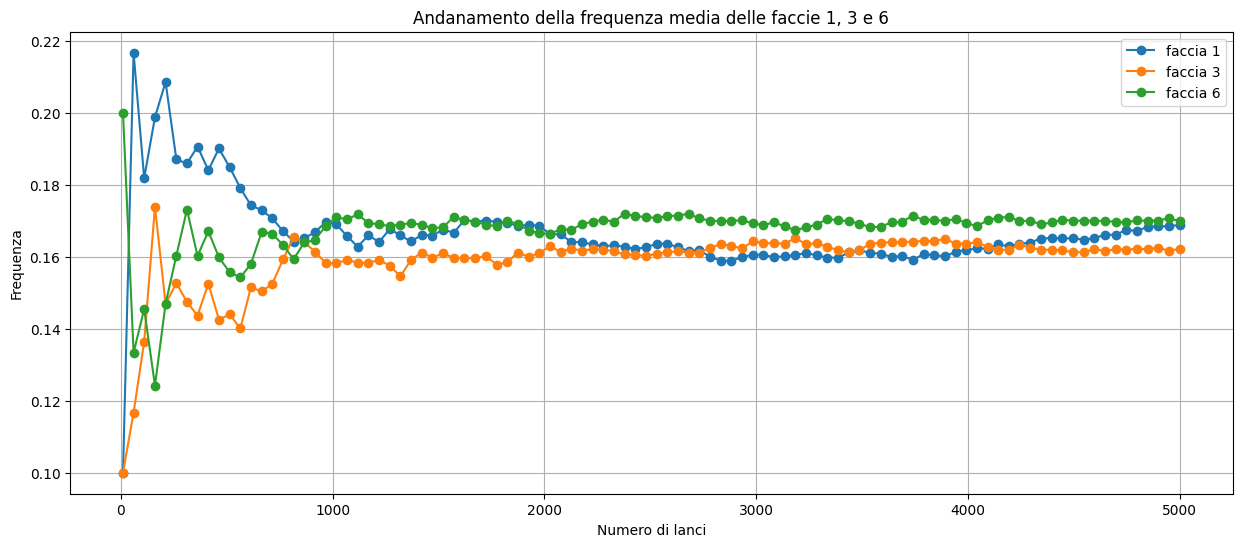

In [401]:
#3
frequenza.reshape(100,6) #Trasformo l'array delle array di frequenze in una matrice 100*6
faccia_1_3_6 = frequenza[:,[0,2,5]] #estrago solo le colonne delle frequenze delle faccie 1,3 e 6

plt.figure(figsize=(15,6))
plt.plot(lanci, faccia_1_3_6[:,0], label="faccia 1", marker="o")
plt.plot(lanci, faccia_1_3_6[:,1], label="faccia 3", marker="o")
plt.plot(lanci, faccia_1_3_6[:,2], label="faccia 6", marker="o")
plt.title("Andanamento della frequenza media delle faccie 1, 3 e 6")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenza")
plt.legend()
plt.grid(True)
plt.show()


## Esercizio 3

1. Genera una matrice NumPy di dimensioni 7 x 7, con valori estratti da una distribuzione normale con media = 0, ed std = 5.

2. Per ogni riga, identifica il valore più lontano da zero (cioè con valore assoluto massimo). Crea un array con questi 7 valori (uno per riga).

3. Calcola quante di queste righe hanno il valore più lontano da zero positivo?

In [402]:
np.random.seed(0)

#1
matrice = np.random.normal(0, 5, size=(7,7))

#2
distanze = np.abs(matrice) # matrice delle distanze
indice_max = distanze.argmax(axis=1) #indice delle colonne dove c'è il valore più lontano da zero
indice_riga = np.arange(0,7) #indice delle righee
risultato = matrice[indice_riga, indice_max] #array dei valori trovati
print("Valori più lontano da zero = ",risultato)

#3
count = (risultato > 0).sum()
print("Ci sono",count, "righe con il valore più lantano da zero positivo.")

Valori più lontano da zero =  [ 11.204466     7.27136753 -12.76494908  11.34877312  -9.90398234
  -7.10008969   9.75387698]
Ci sono 4 righe con il valore più lantano da zero positivo.


## Esercizio 4 

Utilizza il dataset cereal.csv.

Contiene dati nutrizionali (proteine, fibre, calorie, zuccheri, ecc.) per circa 70 cereali.


1.  Aggiungi una colonna chiamata `nutri_score`, definita come:
$$
\texttt{nutri\_score} = \frac{\texttt{protein} + \texttt{fiber}}{\texttt{calories}}
$$

Indica quanti nutrienti positivi ci sono per ogni caloria: più è alto, più il cereale è "nutriente a parità di energia.

2. Trova i **5 cereali con il `nutri_score` più alto** e stampali con `name` e `nutri_score`.

3. Filtra i cereali che soddisfano entrambi i criteri:

   - meno di 120 calorie  
   - più di 2 grammi di fibra 


4. **Crea un grafico a barre** dei **10 cereali con il `nutri_score` più alto**, usando `name` sull’asse x.

5. Crea uno **scatter plot** (grafico a punti) che visualizzi:

   - `calories` sull’asse x  
   - `nutri_score` sull’asse y
   - `protein` nel colore dei punti


I 5 cereali con il nutri_score più alto:
                         name  nutri_score
3   All-Bran with Extra Fiber     0.360000
0                   100% Bran     0.200000
2                    All-Bran     0.185714
9                 Bran Flakes     0.088889
64     Shredded Wheat 'n'Bran     0.077778


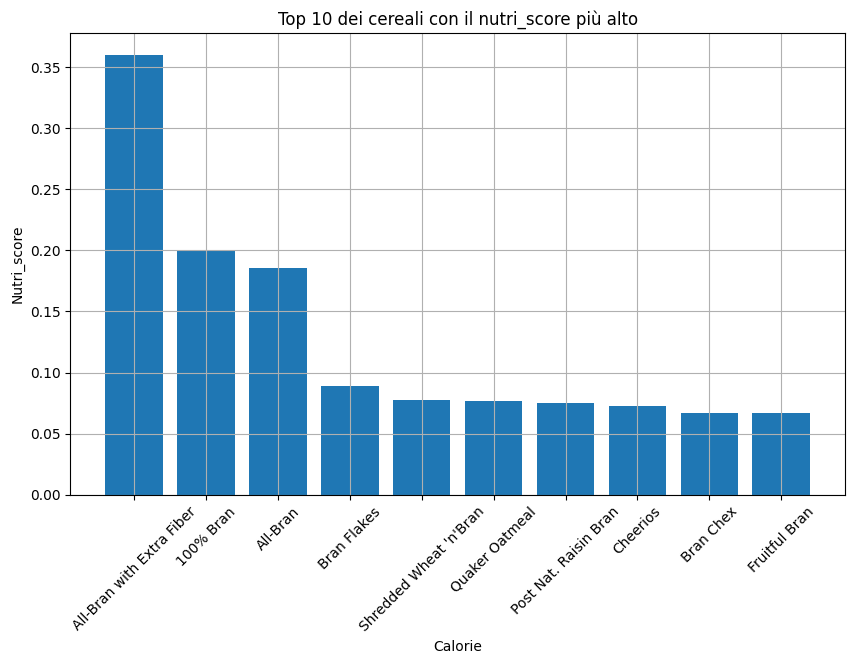

In [403]:
import pandas as pd

df = pd.read_csv("cereal.csv", sep=";")

#1
df["nutri_score"] = (df["protein"] + df["fiber"])/df["calories"] #aggiungo la colonna nutri_score

#2
top_5 = df.sort_values(by="nutri_score", ascending=False).head(5) #Estraggo i 5 cereali per nutri_score decrescente
print("I 5 cereali con il nutri_score più alto:")
print(top_5[["name","nutri_score"]])

#3
df_cut = df[(df["calories"]<120)&(df["fiber"]>2)]

#4
top_10 = df.sort_values(by="nutri_score", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10["name"], top_10["nutri_score"])
plt.xticks(rotation=45)
plt.xlabel("Calorie")
plt.ylabel("Nutri_score")
plt.title("Top 10 dei cereali con il nutri_score più alto")
plt.grid(True)
plt.show()

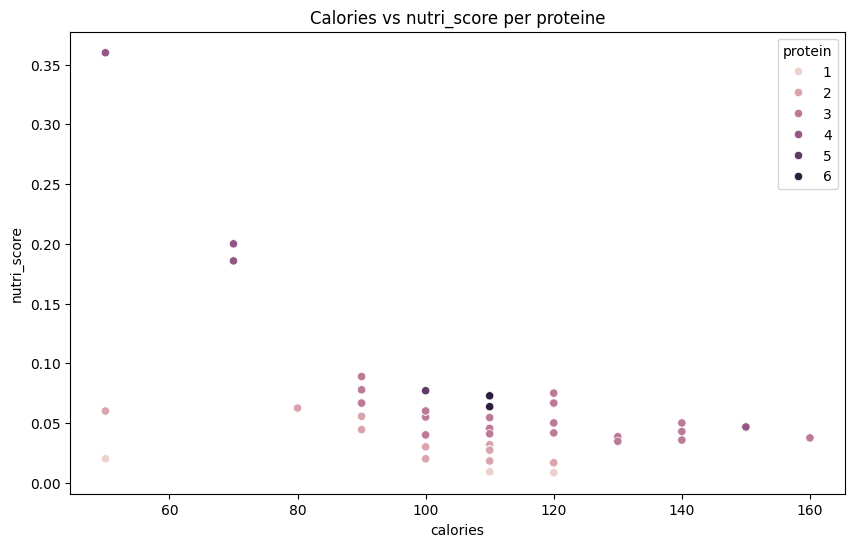

In [404]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["calories"], y=df["nutri_score"], hue=df["protein"])
plt.title("Calories vs nutri_score per proteine")
plt.show()

## Esercizio 5 

Utilizza il dataset `imdb_top_1000.csv`, che contiene informazioni su 1000 film recensiti su IMDB.

1. Quanti **valori mancanti** ci sono per colonna? Elimina le righe con i valori mancanti.

2. Elimina la colonna `Overview`. Aggiungi una colonna (`main_genre`) con solo il primo genere della colonna `genre`. Quali sono i 5 generi più frequenti?

3. Che attore/attrice è stato/a più volte la `Star1` e quello/a che ha fatto più film.

4. Calcola l'IMDB_rating medio e il Gross medio di ogni genere. Fai uno scatter plot dell'IMDB_rating medio e il Gross medio di ogni genere. Riesci a mettere anche l'ettichetta del genere?

5. Visualizza la distribuzione del IMDB_rating  e la distribuzione del `Gross` dei primi 5 main_genre. (Hint fai due violin plot).




In [405]:
df = pd.read_csv("imdb_top_1000 (1).csv")

#1
# print("Valori mancanti per colonna:")
# print(df.isnull().sum())

df = df.dropna() #tolgo le righecon valori mancanti

#2
df = df.drop(columns="Overview") #tolgo la colonna Overview
df["main_genre"] = np.array([n.strip().split(",")[0] for n in df["Genre"]]) #aggiungo la colonna main_genre

# print("I 5 generi più frequenti:")
# print(df["main_genre"].value_counts().head(5))

#3
star1 = df["Star1"].value_counts().reset_index()
print("L'attore/attrice che è stato più volte la Star1 è : ",star1["Star1"][0])
film = df[["Star1","Star2","Star3","Star4"]].value_counts().idxmax()
print("L'attore/attrice che ha/hanno fatto più film è/sono :", film)

imdb_medio = df.groupby("main_genre")["IMDB_Rating"].mean().reset_index() #calcolo l'IMDB_rating medio di ogni genere
gross_medio = df.groupby("main_genre")["Gross"].mean().reset_index() #calcolo il Gross medio di ogni genere

L'attore/attrice che è stato più volte la Star1 è :  Tom Hanks
L'attore/attrice che ha/hanno fatto più film è/sono : ('Daniel Radcliffe', 'Emma Watson', 'Rupert Grint', 'Michael Gambon')


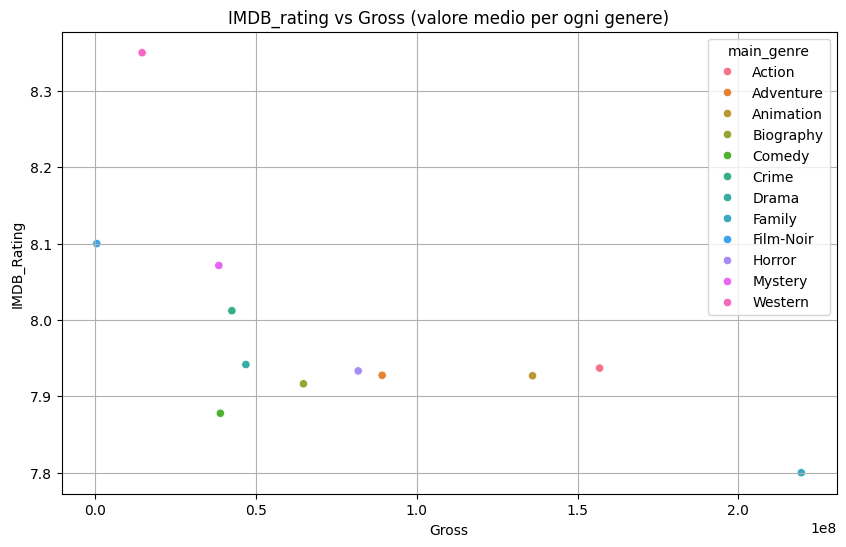

In [406]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=imdb_medio["IMDB_Rating"], x=gross_medio["Gross"], hue= imdb_medio["main_genre"])
plt.title("IMDB_rating vs Gross (valore medio per ogni genere)")
plt.grid(True)
plt.show()

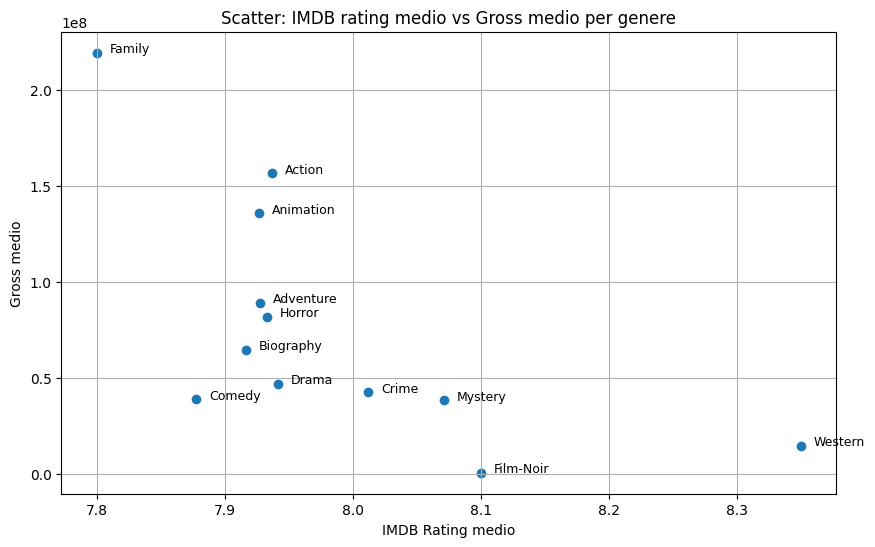

In [407]:
# df["Gross"] = df["Gross"].str.replace(",", "").astype(float)  # pulizia numerica
mean_values = df.groupby("main_genre")[["IMDB_Rating", "Gross"]].mean()

plt.figure(figsize=(10,6))
plt.scatter(mean_values["IMDB_Rating"], mean_values["Gross"])

# aggiungere etichette dei generi
for genre, row in mean_values.iterrows():
    plt.text(row["IMDB_Rating"]+0.01, row["Gross"], genre, fontsize=9)

plt.xlabel("IMDB Rating medio")
plt.ylabel("Gross medio")
plt.title("Scatter: IMDB rating medio vs Gross medio per genere")
plt.grid(True)
plt.show()

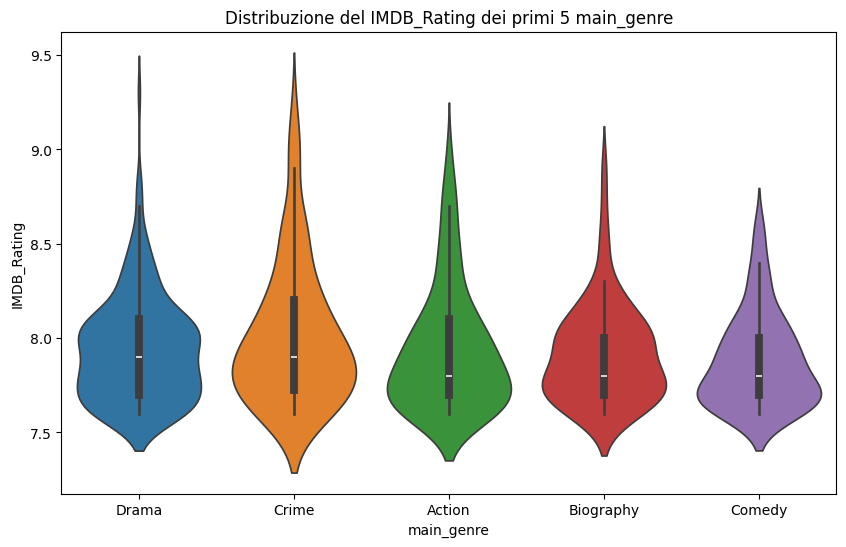

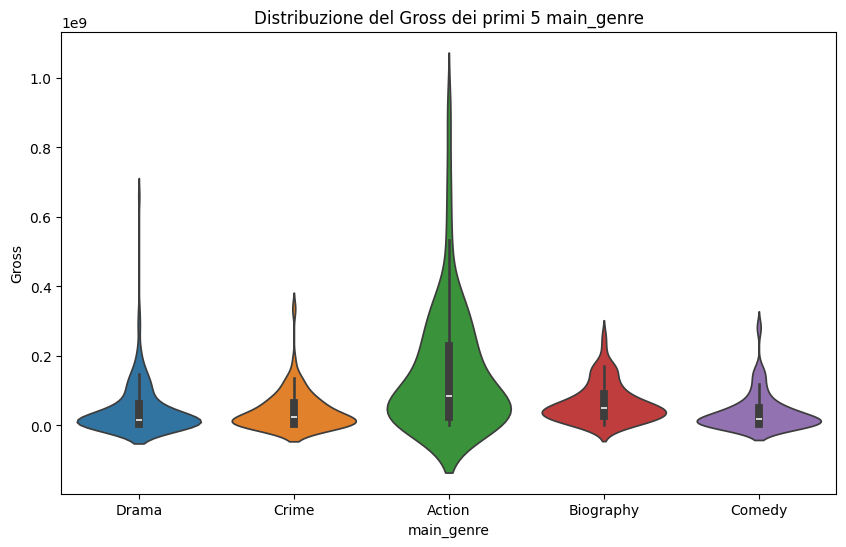

In [408]:
#5
primmi_5 = df["main_genre"].value_counts().reset_index().head(5) #ragruppo i primi 5 generi
top5 = df[df["main_genre"].isin(primmi_5["main_genre"])] #ragruppo i dati per i primi 5 generi

plt.figure(figsize=(10,6))
sns.violinplot(data=top5, x="main_genre", y="IMDB_Rating", hue="main_genre")
plt.title("Distribuzione del IMDB_Rating dei primi 5 main_genre")

plt.figure(figsize=(10,6))
sns.violinplot(data=top5, x="main_genre", y="Gross", hue="main_genre")
plt.title("Distribuzione del Gross dei primi 5 main_genre")
plt.show()

In [409]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,main_genre
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,Drama
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime


## Esercizio 6

Considera i seguenti dati, che :

`x = np.linspace(0, 10, 100)`  
`y = -3.5 * x + 2 + np.random.normal(0, 10, 100)`

Cerca di riprodurre la retta fittando i parametri della funzione y = ax + b.

1. Stima i parametri della retta.
2. Calcola l’intervallo di confidenza al 95% dei parametri a e b.
N.B il secondo output del metodo curve_fit è proprio la matrice di covarianza: `params, cov = curve_fit(retta, x, y)`. 
L'**errore standard** di ciascun parametro si calcola come:

$$
\text{errore\_standard}_i = \sqrt{\text{cov}(i, i)}
$$

dove $\text{cov}(i, i)$ è l'elemento diagonale $i$-esimo della **matrice di covarianza**.

L’**intervallo di confidenza al 95%** si approssima con:

$$
\text{parametro}_i \pm 1.96 \times \text{errore\_standard}_i
$$
3. Plotta i punti originali e la retta ottenuta con anche l'intervallo di confidenza

Intervallo di confidenza(a 95%) per a : [-4.479, -3.115]
Intervallo di confidenza(a 95%) per b : [0.138, 8.031]


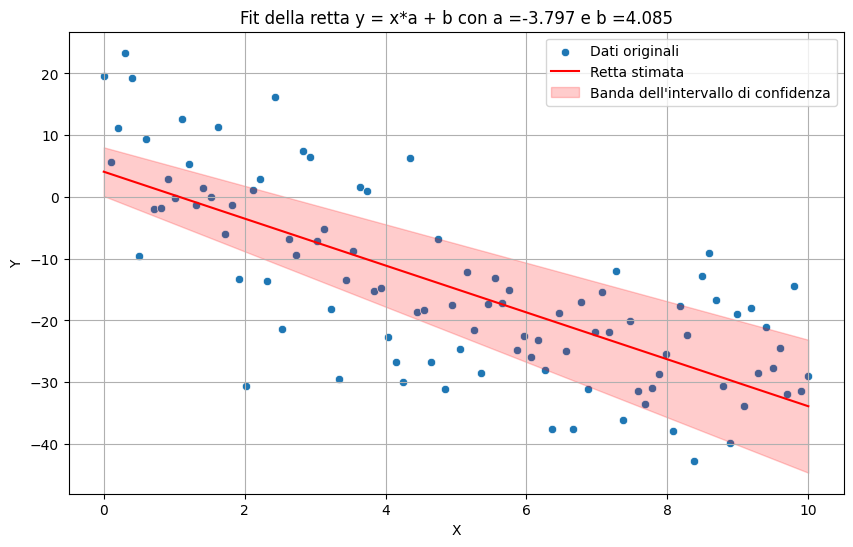

In [410]:
import scipy as sp
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = -3.5 * x + 2 + np.random.normal(0, 10, 100)

#1
#funzione per il calcolo della retta
def retta(x, a, b):
    return x*a+b

params, cov = sp.optimize.curve_fit(retta, x, y)
a, b = params
# print(f"I parametri della retta sono a ={a:.3f} e b ={b:.3f}")

#2
errore_standard = np.sqrt(np.diag(cov))
#Intervallo di confidenza 
int_a = (a - 1.96*errore_standard[0], a + 1.96*errore_standard[0]) #estremo superiore dell'intervall di confidenza
int_b = (b - 1.96*errore_standard[1], b + 1.96*errore_standard[1]) #estremo superiore dell'intervallo di confidenza

print(f"Intervallo di confidenza(a 95%) per a : [{int_a[0]:.3f}, {int_a[1]:.3f}]")
print(f"Intervallo di confidenza(a 95%) per b : [{int_b[0]:.3f}, {int_b[1]:.3f}]")

y_min = retta(x, int_a[0], int_b[0]) #retta inferiore per l'intervallo di confidenza
y_max = retta(x, int_a[1], int_b[1]) #retta superiore per l'intervallo di confidenza
#3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, label="Dati originali")
plt.plot(x, retta(x, a, b), label=f"Retta stimata", color="red")
plt.fill_between(x, y_min, y_max, alpha =.2, color="red", label="Banda dell'intervallo di confidenza")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Fit della retta y = x*a + b con a ={a:.3f} e b ={b:.3f}")
plt.grid(True)
plt.show()